In [2]:
import wandb 
import pandas as pd

In [3]:
 run = wandb.init(project="nyc_airbnb", group="eda", save_code=True)
 local_path = wandb.use_artifact("sample.csv:latest").file()
 df = pd.read_csv(local_path)

wandb: Currently logged in as: dustin-friedline. Use `wandb login --relogin` to force relogin


# Doing EDA and profiling manual
Im using matoplotlib and seaborn to do a bit of EDA analysis because i have better things to do than to try go get a 3year old set up working with pandas profiling. It's not the fault of the person who will read this, i know. I just don't want to have any comments on my project regarding why i did not use pandas profiling

                 id       host_id      latitude     longitude         price  \
count  2.000000e+04  2.000000e+04  20000.000000  20000.000000  20000.000000   
mean   1.892380e+07  6.746034e+07     40.728455    -73.952125    153.269050   
std    1.101223e+07  7.857936e+07      0.054755      0.046559    243.325609   
min    2.539000e+03  2.571000e+03     40.508730    -74.239140      0.000000   
25%    9.393540e+06  7.853718e+06     40.689420    -73.983030     69.000000   
50%    1.952117e+07  3.111431e+07     40.722730    -73.955640    105.000000   
75%    2.912936e+07  1.068426e+08     40.762990    -73.936380    175.000000   
max    3.648561e+07  2.742733e+08     40.913060    -73.717950  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    20000.000000       20000.000000       15877.000000   
mean         6.992100          23.274100           1.377446   
std         21.645449          44.927793           1.683006   
min          1.000000           0.00

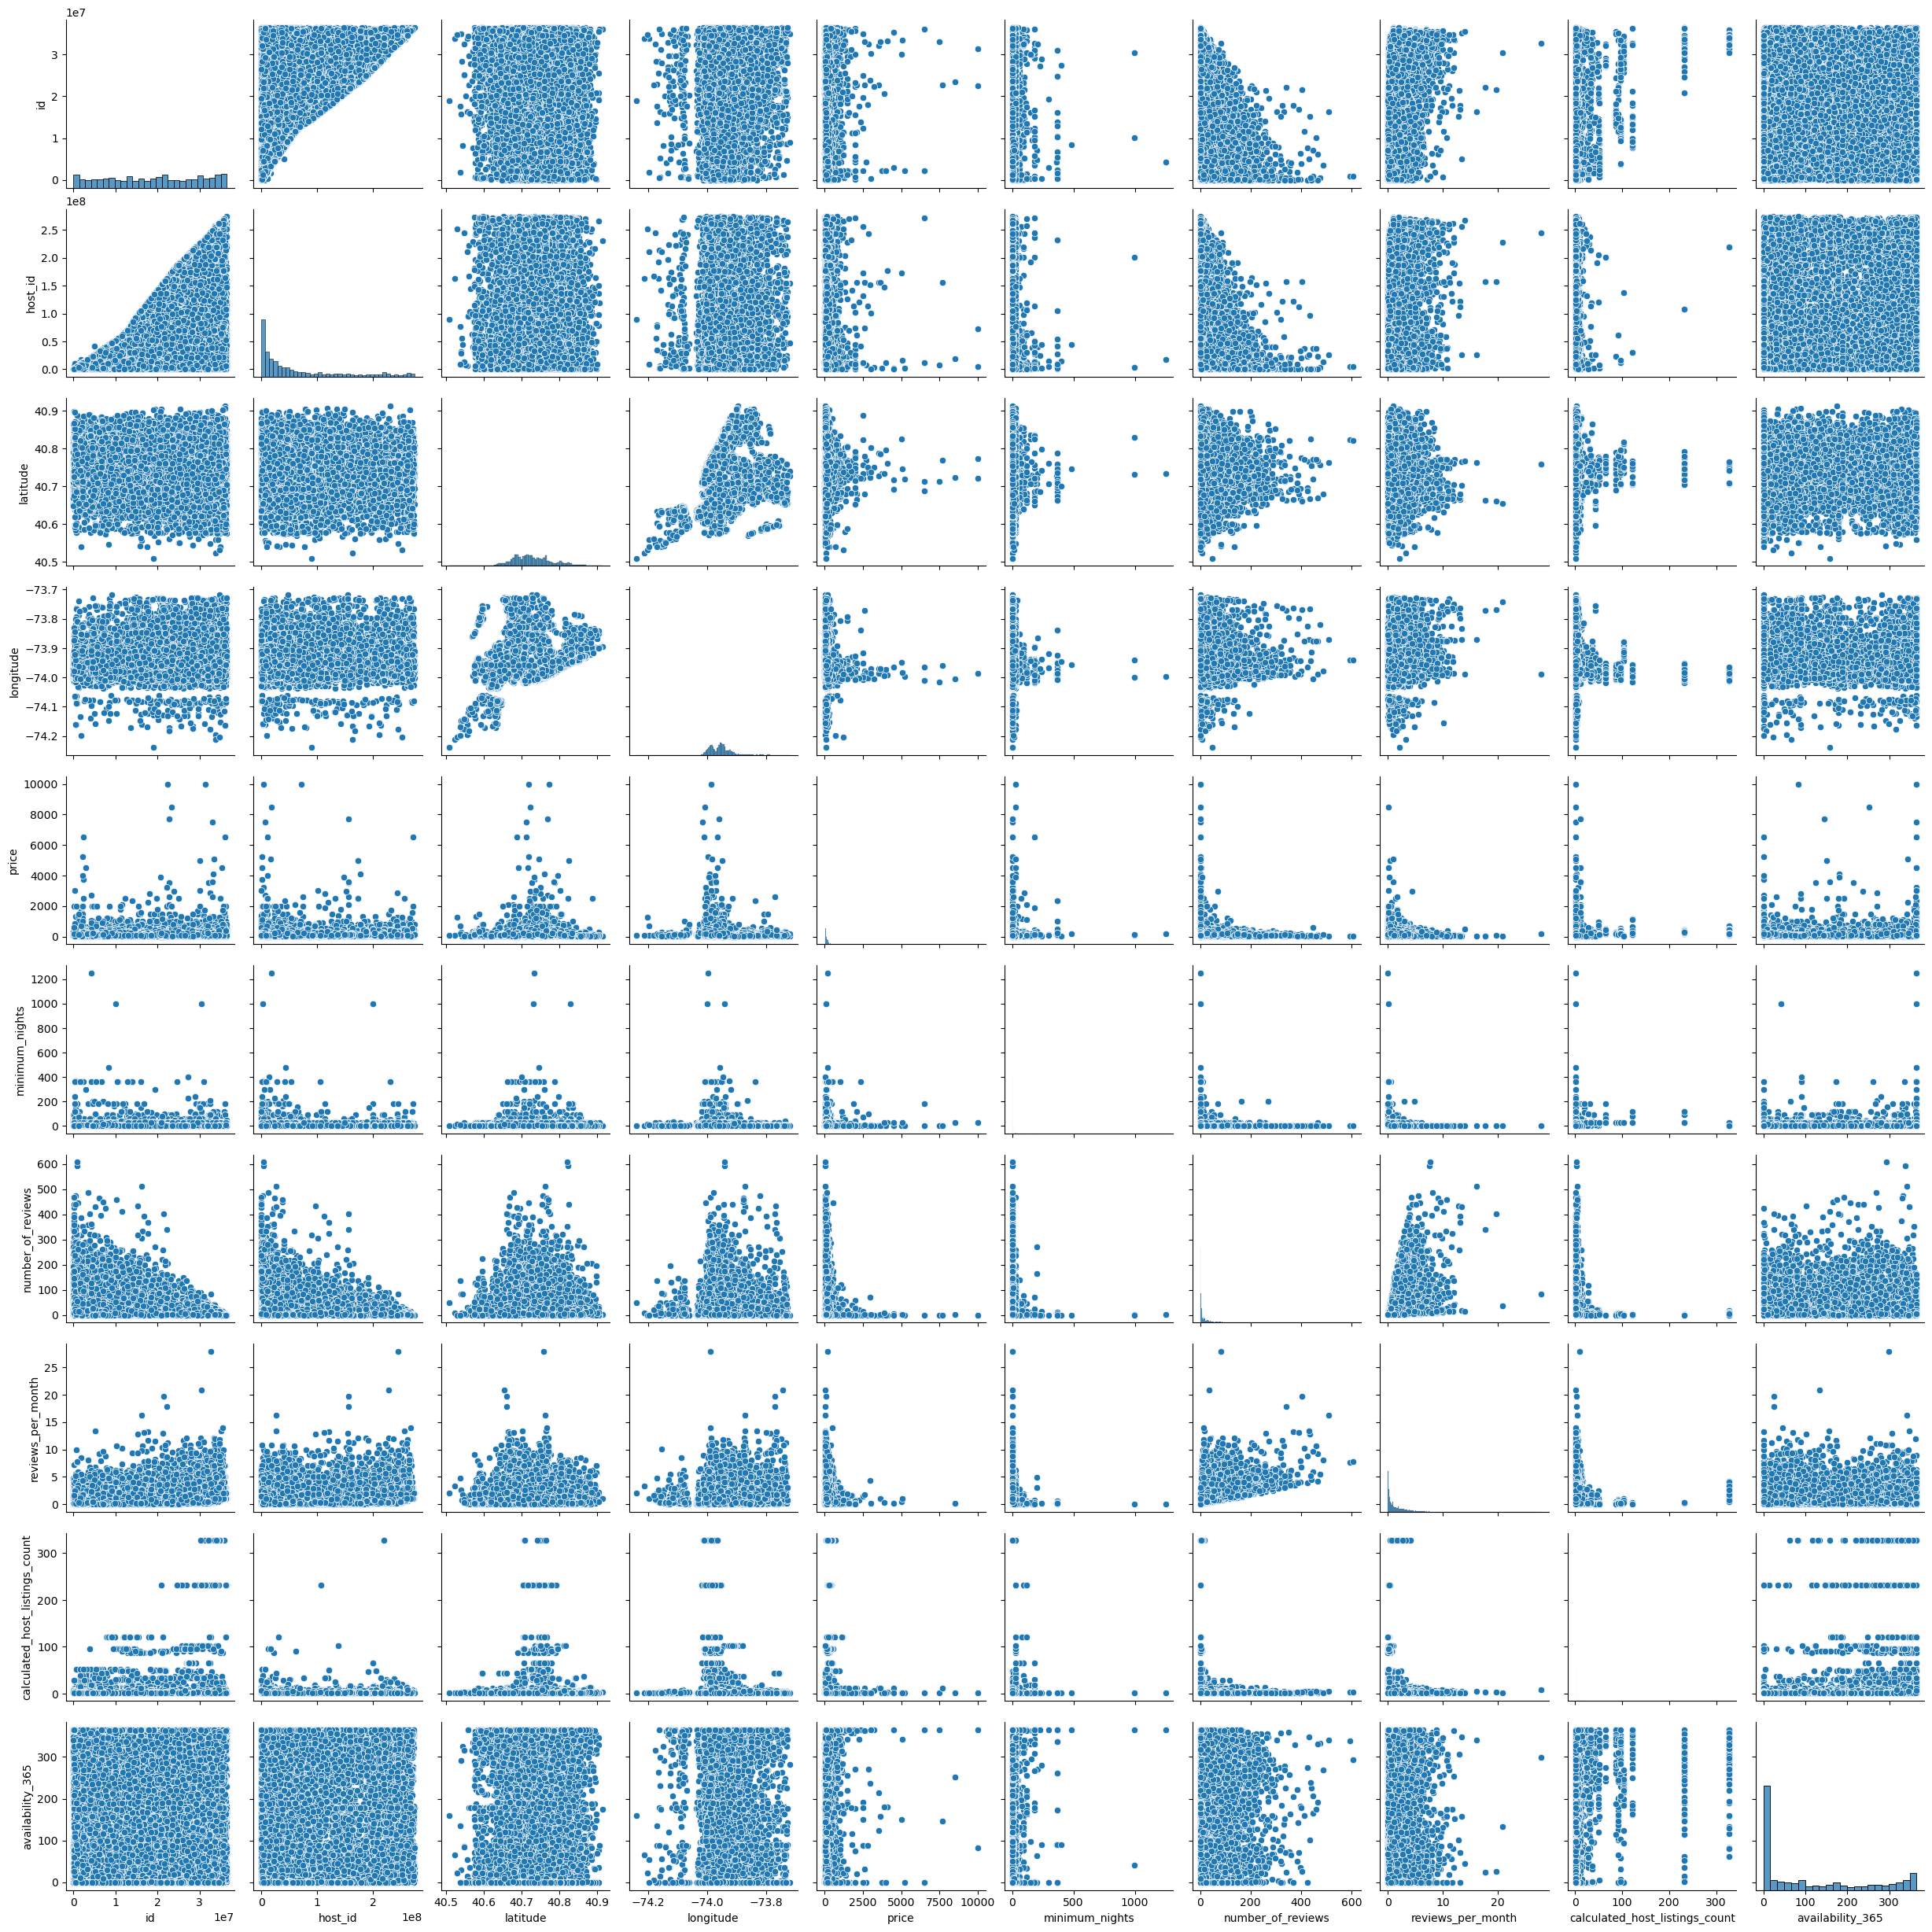

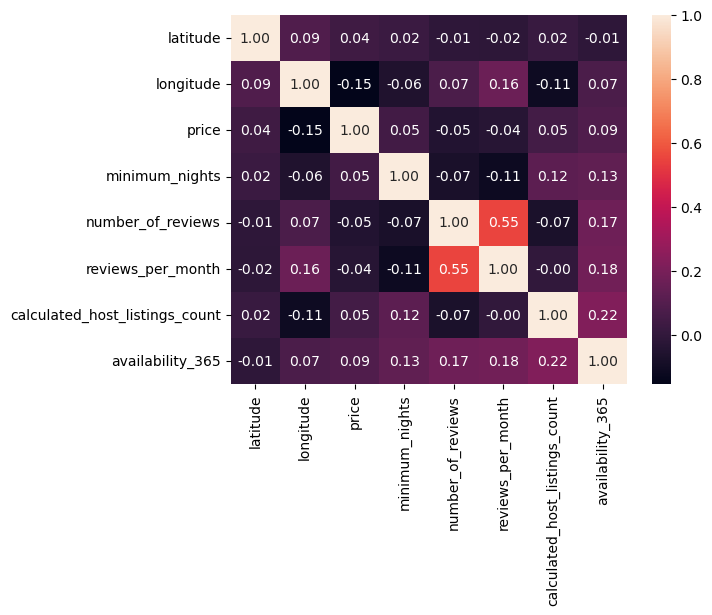

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Summary statistics
print(df.describe())

# Pairwise relationships
sns.pairplot(df)
plt.show()

# Correlation heatmap
numeric_columns = [
    'latitude',
    'longitude',
    'price',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365'
]
# Select only the specified numeric columns from the DataFrame
selected_numeric_df = df[numeric_columns]

# Calculate the correlation matrix for the selected numeric columns
corr = selected_numeric_df.corr()
# Visualize the correlation heatmap
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

In [7]:
min_price = 10
max_price = 350
idx = df['price'].between(min_price, max_price)
df = df[idx].copy()
# Convert last_review to datetime
df['last_review'] = pd.to_datetime(df['last_review'])

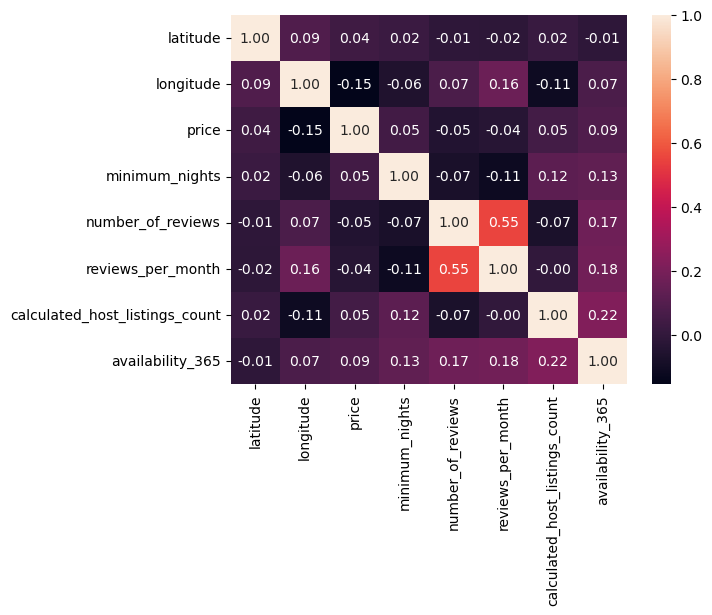

In [8]:
corr = selected_numeric_df.corr()
# Visualize the correlation heatmap
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

In [9]:
run.finish()